<a href="https://colab.research.google.com/github/niuguy/digithealthcourse/blob/master/%5B023%5DMIMIC3_Mortality_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## What is machine learning

![machine learning](https://github.com/niuguy/digithealthcourse/blob/master/pics/Programming%20and%20Machine%20learning.png?raw=true)

## The pipeline

![Ml_pipeline](https://github.com/niuguy/digithealthcourse/blob/master/pics/ML_pipeline.png?raw=true)

## Case study for mortality prediction

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import f1_score
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline

### Train Test Split

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
df_m3 = pd.read_csv('/content/drive/My Drive/Dataset/df_m3_processed.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
features = [ 'ADMISSION_TYPE',
       'MARITAL_STATUS', 'INSURANCE', 'LANGUAGE',
       'RELIGION', 'ETHNICITY', 'GENDER', 'AGE', 'CALLOUT_COUNT',
       'DIAG_COUNT', 'PRES_COUNT', 'PROC_COUNT', 'CPT_COUNT', 'LAB_COUNT',
       'INPUTS_CV_COUNT', 'INPUTS_MV_COUNT', 'OUTPUT_COUNT', 'TRANSFER_COUNT',
       'MICRO_COUNT']

### Scaling

In [0]:
train_X = df_m3.loc[:,features]
train_y = df_m3.loc[:,'MORTAL']

In [0]:
scaler = MinMaxScaler()
train_X = scaler.fit_transform(train_X)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(train_X, train_y, test_size=0.2, random_state=2, stratify=train_y)

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [0]:
help(train_test_split)

### RandomForest

![RandomForest](https://github.com/niuguy/digithealthcourse/blob/master/pics/RandomForestClassifire.jpg?raw=true)

In [0]:
rf = RandomForestClassifier(n_estimators=200,
                             random_state = 42,
                             n_jobs=-1)

In [24]:
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print('F1 Score: {:.2f}'.format(f1_score(y_test, y_pred)))
print('Classification report\n',classification_report(y_test, y_pred))    

F1 Score: 0.45
Classification report
               precision    recall  f1-score   support

           0       0.92      0.99      0.95      9151
           1       0.83      0.31      0.45      1199

    accuracy                           0.91     10350
   macro avg       0.87      0.65      0.70     10350
weighted avg       0.91      0.91      0.89     10350



https://en.wikipedia.org/wiki/F1_score 

![classification matrics](https://github.com/niuguy/digithealthcourse/blob/master/pics/classification_metrics.jpg?raw=true)

Confusion matrix

Confusion matrix:
[[9073   78]
 [ 824  375]]


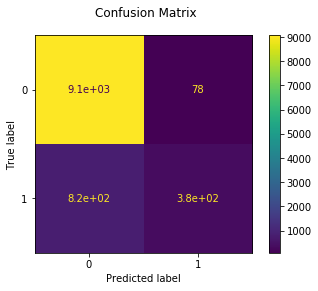

In [26]:
disp = plot_confusion_matrix(rf, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print("Confusion matrix:\n%s" % disp.confusion_matrix)

Feature Importance

In [0]:

# function for creating a feature importance dataframe
def imp_df(column_names, importances):
    df = pd.DataFrame({'feature': column_names,
                       'feature_importance': importances}) \
           .sort_values('feature_importance', ascending = False) \
           .reset_index(drop = True)
    return df

# plotting a feature importance dataframe (horizontal barchart)
def var_imp_plot(imp_df, title):
    imp_df.columns = ['feature', 'feature_importance']
    sns.barplot(x = 'feature_importance', y = 'feature', data = imp_df, orient = 'h', color = 'royalblue') \
       .set_title(title, fontsize = 20)

In [30]:
base_imp = imp_df(features, rf.feature_importances_)
base_imp

,feature,feature_importance
0,INPUTS_CV_COUNT,0.091974
1,OUTPUT_COUNT,0.090835
2,LAB_COUNT,0.086317
3,TRANSFER_COUNT,0.080411
4,DIAG_COUNT,0.076004
5,AGE,0.075811
6,MICRO_COUNT,0.068047
7,INPUTS_MV_COUNT,0.066589
8,PRES_COUNT,0.066505
9,CPT_COUNT,0.062729


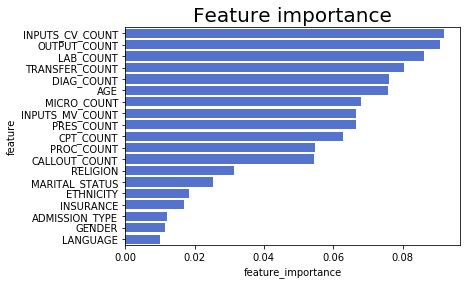

In [31]:
var_imp_plot(base_imp, 'Feature importance')

**Q:** Can we get to the conclusion that INPUTS_CV_COUNT and OUTPUT_COUNT are the most important features?

Reference    [Explaining Feature Importance by example of a Random Forest](https://towardsdatascience.com/explaining-feature-importance-by-example-of-a-random-forest-d9166011959e) 

More about RandomForest  https://youtube.com/watch?v=J4Wdy0Wc_xQ

### Logistic Regression

![Logistic Regression](https://github.com/niuguy/digithealthcourse/blob/master/pics/Logistic%20Regression.png?raw=true)

What's the difference between Linear regression and Logistic regression?   https://www.youtube.com/watch?v=yIYKR4sgzI8

In [11]:
logreg = LogisticRegression()
logreg.fit(scaler.fit_transform(X_train), y_train)
y_pred = logreg.predict(scaler.fit_transform(X_test))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [12]:
print('F1 Score: {:.2f}'.format(f1_score(y_test, y_pred)))
print('Classification report\n',classification_report(y_test, y_pred))   

F1 Score: 0.09
Classification report
               precision    recall  f1-score   support

           0       0.89      1.00      0.94      9151
           1       0.56      0.05      0.09      1199

    accuracy                           0.89     10350
   macro avg       0.72      0.52      0.51     10350
weighted avg       0.85      0.89      0.84     10350



### Linear SVC

![alt text](https://github.com/niuguy/digithealthcourse/blob/master/pics/SVM_margin.png?raw=true)

In [0]:
svc = SVC(kernel='linear')
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

In [11]:
print('F1 Score: {:.2f}'.format(f1_score(y_test, y_pred)))
print('Classification report\n',classification_report(y_test, y_pred))   

F1 Score: 0.04
Classification report
               precision    recall  f1-score   support

           0       0.89      1.00      0.94      9151
           1       0.78      0.02      0.04      1199

    accuracy                           0.89     10350
   macro avg       0.83      0.51      0.49     10350
weighted avg       0.87      0.89      0.84     10350



### Gaussian Naive Bayes

![alt text](https://www.saedsayad.com/images/Bayes_rule.png)

https://www.youtube.com/watch?v=CPqOCI0ahss

In [12]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
y_pred = gaussian.predict(X_test)

print('F1 Score: {:.2f}'.format(f1_score(y_test, y_pred)))
print('Classification report\n',classification_report(y_test, y_pred))   

F1 Score: 0.13
Classification report
               precision    recall  f1-score   support

           0       0.89      0.96      0.92      9151
           1       0.22      0.09      0.13      1199

    accuracy                           0.86     10350
   macro avg       0.55      0.52      0.53     10350
weighted avg       0.81      0.86      0.83     10350



### K nearest neighbors

![alt text](https://github.com/niuguy/digithealthcourse/blob/master/pics/KNN_final1_ibdm8a.png?raw=true)

In [14]:
knn=KNeighborsClassifier() 
knn.fit(X_train, y_train)
y_pred=knn.predict(X_test)
print('F1 Score: {:.2f}'.format(f1_score(y_test, y_pred)))
print('Classification report\n',classification_report(y_test, y_pred))   

F1 Score: 0.28
Classification report
               precision    recall  f1-score   support

           0       0.90      0.98      0.94      9151
           1       0.53      0.19      0.28      1199

    accuracy                           0.89     10350
   macro avg       0.72      0.59      0.61     10350
weighted avg       0.86      0.89      0.86     10350



## Cross Validation

**Q**:  How can we know the train-test split strategy is the best way to train the data?

We should train and test our algorithm on each and every instance of the dataset. Then we can take an average of all the noted accuracies over the dataset. The strategy we are going to use is called k-fold validation. 
The general procedure is as follows:(refer to https://machinelearningmastery.com/k-fold-cross-validation/)
* Shuffle the dataset randomly.
* Split the dataset into k groups
* For each unique group:
  * Take the group as a hold out or test data set
  * Take the remaining groups as a training data set
  * Fit a model on the training set and evaluate it on the test set
  * Retain the evaluation score and discard the model
* Summarize the skill of the model using the sample of model evaluation scores


![alt text](https://scikit-learn.org/stable/_images/grid_search_cross_validation.png)

In [15]:
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
kfold = KFold(n_splits=5, random_state=22) # k=5, split the data into 5 equal parts

results=[]
classifiers=['Logistic Regression','KNN','Naive Bayes','Random Forest']
# train_X = scaler.fit_transform(train_X)
models=[LogisticRegression(max_iter=1000),KNeighborsClassifier(),GaussianNB(),RandomForestClassifier(n_estimators=200)]
for model in models:
    cv_result = cross_val_score(model,scaler.fit_transform(train_X),train_y, cv = kfold,scoring = "accuracy")
    cv_result=cv_result
    results.append(cv_result)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 0

  FitFailedWarning)


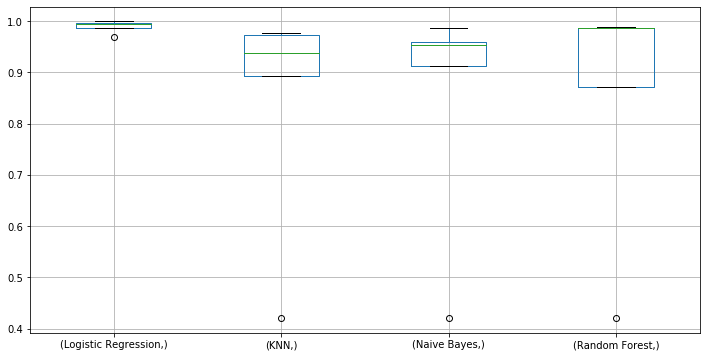

In [16]:
plt.subplots(figsize=(12,6))
box=pd.DataFrame(results,index=[classifiers])
box.T.boxplot()

### Neural Network

![NN](https://github.com/niuguy/digithealthcourse/blob/master/pics/neural%20networks.png?raw=true)

What is Neural Network?

https://www.youtube.com/watch?v=bfmFfD2RIcg

In [0]:
import keras 
from keras.models import Sequential # intitialize the ANN
from keras.layers import Dense      # create layers

Using TensorFlow backend.


In [0]:
# Initialising the NN
model = Sequential()

# layers
model.add(Dense(units = 9,  activation = 'relu', input_dim = 19))
# model.add(Dense(units = 9, activation = 'relu'))
model.add(Dense(units = 5, activation = 'relu'))
model.add(Dense(units = 1, activation = 'sigmoid'))

# Compiling
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Train
model.fit(X_train, y_train, batch_size = 32, epochs = 100)






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/100





41398/41398 [==============================] - 2s 55us/step - loss: 0.3798 - acc: 0.8801
Epoch 2/100
41398/41398 [==============================] - 2s 38us/step - loss: 0.3049 - acc: 0.8861
Epoch 3/100
41398/41398 [==============================] - 2s 39us/step - loss: 0.2930 - acc: 0.8881
Epoch 4/100
41398/41398 [==============================] - 2s 40us/step - loss: 0.2880 - acc: 0.8891
Epoch 5/100
41398/41398 [==============================] - 2s 40us/step - loss: 0.2855 - acc: 0.8898
Epoch 6/100
41398/41398 [==============================] - 2s 41us/step - loss: 0.2830 - acc: 0.8919
Epoch 7/100
41398/41398 [==============================] - 2s 40us/step - loss: 0.2811 - acc: 0.8940
Epoch 8/100
41398/41398 [==============================] - 2s 40us/step - loss: 0.2793 - acc: 0.8946
Epoch 9/100
41398/41398 [==============================] - 2s 39us/step - loss: 0.278

In [0]:
y_pred = model.predict(X_test)
y_final = (y_pred > 0.5).astype(int).reshape(X_test.shape[0])

In [0]:
print('F1 Score: {:.2f}'.format(f1_score(y_test, y_final)))
print('Classification report\n',classification_report(y_test, y_final))   

F1 Score: 0.45
Classification report
               precision    recall  f1-score   support

           0       0.92      0.98      0.95      9151
           1       0.68      0.34      0.45      1199

    accuracy                           0.90     10350
   macro avg       0.80      0.66      0.70     10350
weighted avg       0.89      0.90      0.89     10350



Learn more about Neural Network   https://www.youtube.com/watch?v=aircAruvnKk

### What's more?


![alt text](https://miro.medium.com/max/2414/1*ak2utPSmFTOMoZL3mTgWrg.png)

Refer to https://medium.com/datadriveninvestor/homemade-machine-learning-in-python-ed77c4d6e25b